> ### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


> ### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

> ### ***2.1 - Import requirement libraries and data***

In [1]:
## import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# set the style of seaborn
sns.set_style("whitegrid")

import warnings
# ignore warnings
warnings.filterwarnings("ignore")

In [2]:
## read the dataset 
df = pd.read_csv('data/stud.csv')

In [3]:
## show the first 5 rows of the dataset
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
## shape of the dataset
df.shape 

(1000, 8)

>  ***3. Data Checks to perform***

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

> #### 3.1 Check for missing values

In [5]:
## Check for missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

> ### **Observations :-** 🚫
- there is no missing values in our dataset 

> #### 3.2 Check the Duplicates Values

In [6]:
## check the duplicates values
df.duplicated().sum()

np.int64(0)

> ### **Observations :-** 🚫
- there is no duplicated values in our dataset 

> #### 3.3 Check the data types 

In [7]:
## Check info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


> ###  **Observations :-** 📅
#### Basic Information
- **Samples**: 1,000 student records
- **Features**: 8 (3 numeric, 5 categorical)
- **Missing Values**: None (complete dataset)
- **Memory Usage**: ~62.6 KB

#### Column Breakdown
| # | Column Name                  | Non-Null | Dtype   | Unique Values* | Sample Values              |
|---|------------------------------|----------|---------|----------------|----------------------------|
| 0 | gender                       | 1000     | object  | 2              | male, female               |
| 1 | race_ethnicity               | 1000     | object  | 5              | group A, group B, group C  |
| 2 | parental_level_of_education  | 1000     | object  | 6              | high school, some college  |
| 3 | lunch                        | 1000     | object  | 2              | standard, free/reduced     |
| 4 | test_preparation_course      | 1000     | object  | 2              | none, completed           |
| 5 | math_score                   | 1000     | int64   | Continuous     | 72, 85, 93                |
| 6 | reading_score                | 1000     | int64   | Continuous     | 68, 90, 82                |
| 7 | writing_score                | 1000     | int64   | Continuous     | 75, 88, 79                |

*Estimated unique values for categorical columns



> #### 3.4 Checking the numbers of unique values 

In [8]:
## checking the unique values
df.nunique() 


gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

> #### 3.5 Check the statistics of the dataset 

In [9]:
## check the statistics of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


> ###  **Observations :-** 🛃

### Test Score Distribution Analysis

#### Summary Statistics
| Metric            | Math Score | Reading Score | Writing Score |
|-------------------|------------|---------------|---------------|
| **Count**         | 1000       | 1000          | 1000          |
| **Mean**          | 66.09      | 69.17         | 68.05         |
| **Std Dev**       | 15.16      | 14.60         | 15.20         |
| **Minimum**       | 0          | 17            | 10            |
| **25th %ile**     | 57         | 59            | 57.75         |
| **Median**        | 66         | 70            | 69            |
| **75th %ile**     | 77         | 79            | 79            |
| **Maximum**       | 100        | 100           | 100           |


1. **Score Comparisons**:
   - Reading scores show the highest average (69.17)
   - Math scores have the widest variability (SD=15.16)
   - Writing scores are most left-skewed (median > mean)

2. **Potential Outliers**:
   - Math: 0 score (possible data entry error)
   - Reading: Minimum 17 (far below 1st %ile)
   


> #### 3.6 Exploring Data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
## print the categories of each categorical column
print("Categories in 'gender' variable: ",end="" )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ",end="" )
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ",end="" )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ",end="" )
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ",end="" )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable: ['none' 'completed']


In [12]:
## define numerical & categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

## print the numerical features
print(f"We have {len(numerical_features)} Numerical Features: {numerical_features}")
## print the categorical features
print(f"\n We have {len(categorical_features)} Categorical Features: {categorical_features} ")

We have 3 Numerical Features: ['math_score', 'reading_score', 'writing_score']

 We have 5 Categorical Features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 


> #### **3.7 Adding Columns 'total score' and 'average score'**

In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [14]:
## Create to columns for the total score and average score
df['total_score']=df['math_score'] + df['reading_score'] + df['writing_score']
df['average']=df['total_score']/3
## Show the first 5 rows of the dataset
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
## Number of students with full marks

##for reading_full_marks
reading_full_score=df[df['reading_score']==100]['average'].count()
print(f"Number of students with full marks in reading: {reading_full_score}")
##for writing_full_marks
writing_full_score=df[df['writing_score']==100]['average'].count()
print(f"Number of students with full marks in writing: {writing_full_score}")
##for math_full_marks
math_full_score=df[df['math_score']==100]['average'].count()
print(f"Number of students with full marks in math: {math_full_score}")

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in math: 7


In [16]:
## Number of students with less than 20 marks
##for reading_less_than_20
reading_less_than_20=df[df['reading_score']<20]['average'].count()
print(f"Number of students with less than 20 marks in reading: {reading_less_than_20}")
##for writing_less_than_20
writing_less_than_20=df[df['writing_score']<20]['average'].count()
print(f"Number of students with less than 20 marks in writing: {writing_less_than_20}")
##for math_less_than_20
math_less_than_20=df[df['math_score']<20]['average'].count()
print(f"Number of students with less than 20 marks in math: {math_less_than_20}")

Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3
Number of students with less than 20 marks in math: 4


> ###  **Observations :-** 📅

#### Perfect Scores (100/100) 
| Subject  | Number of Students | Percentage of Total |
|----------|--------------------|---------------------|
| Reading  | 17                 | 1.7%                |
| Writing  | 14                 | 1.4%                |
| Math     | 7                  | 0.7%                |

#### Low Performers (<20/100)
| Subject  | Number of Students | Percentage of Total |
|----------|--------------------|---------------------|
| Reading  | {reading_lt_20}    | {reading_pct:.1f}%  |
| Writing  | {writing_lt_20}    | {writing_pct:.1f}%  |
| Math     | {math_lt_20}       | {math_pct:.1f}%     |



***Performance Gaps:***

**Math shows the largest disparity:**

- Fewest perfect scores (0.7%)

- Likely most low performers (based on your min scores)

**Reading has both:**

- Most perfect scores (1.7%)

- Significant low performers (17 minimum score)

> #### **4.0 Exploring Data (Visualization)**

- **4.1 Visualize average score distribution to make som conclusion**
 - Histogram

 - Kernel Distribution (KDE)

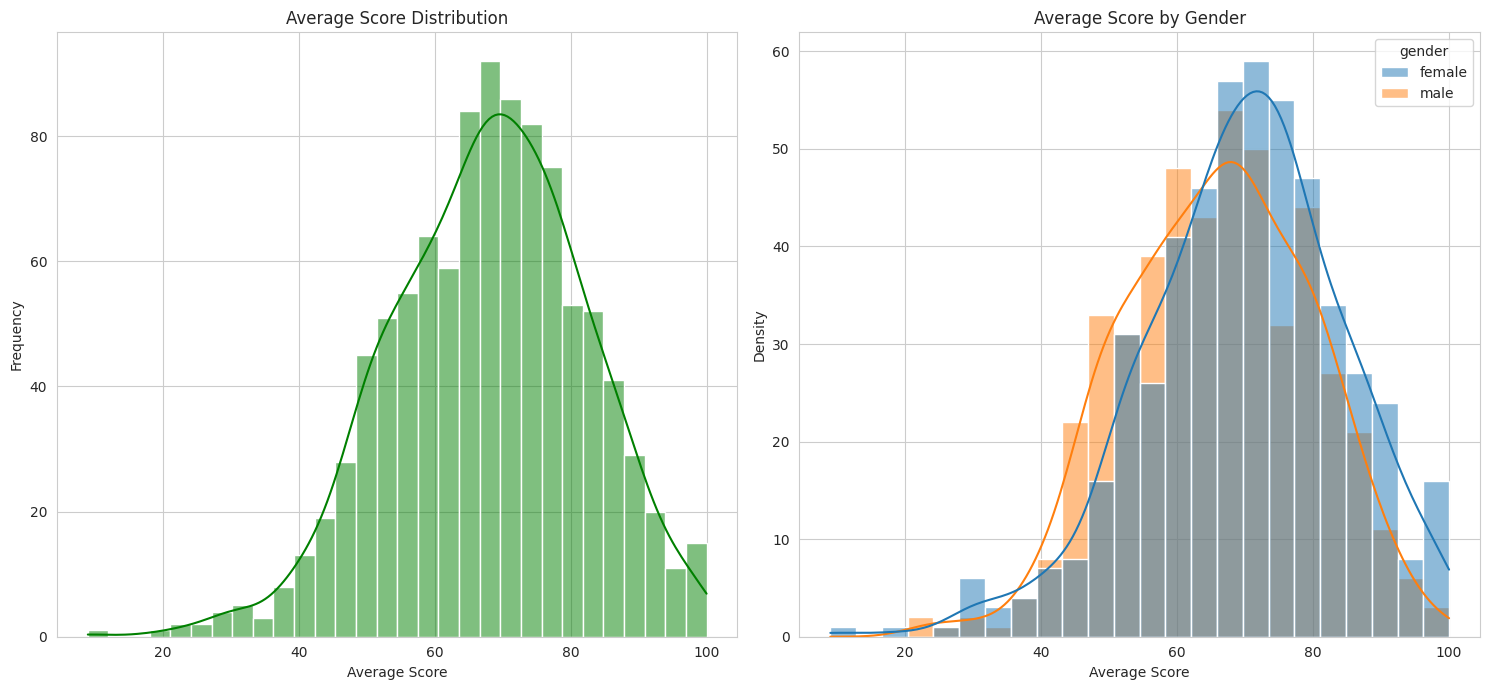

In [20]:
## Visualize average score distribution to make som conclusion 
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First plot: simple histogram
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Average Score Distribution')
axs[0].set_xlabel('Average Score')
axs[0].set_ylabel('Frequency')

# Second plot: histogram with gender hue
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Average Score by Gender')
axs[1].set_xlabel('Average Score')
axs[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


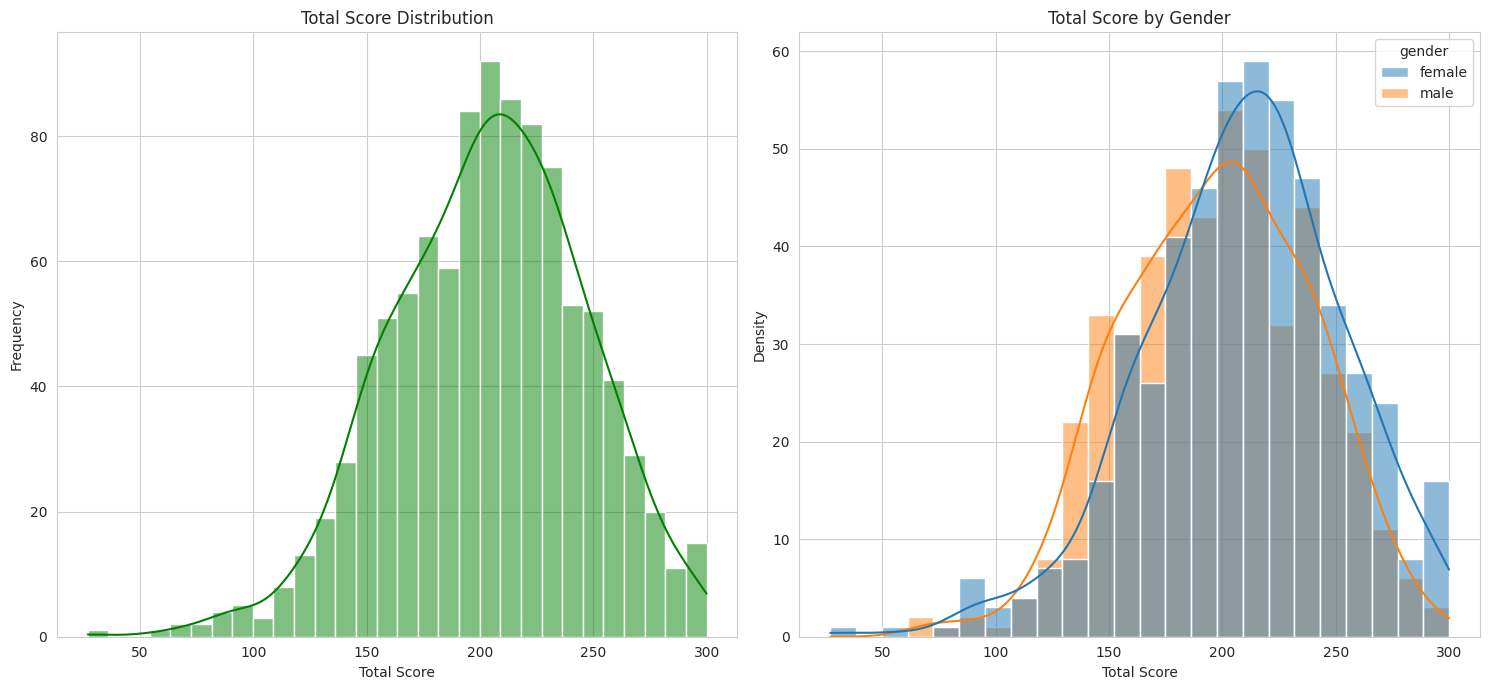

In [22]:
## Visualize Total score distribution to make som conclusion 
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First plot: simple histogram
sns.histplot(data=df, x='total_score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title('Total Score Distribution')
axs[0].set_xlabel('Total Score')
axs[0].set_ylabel('Frequency')

# Second plot: histogram with gender hue
sns.histplot(data=df, x='total_score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title('Total Score by Gender')
axs[1].set_xlabel('Total Score')
axs[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

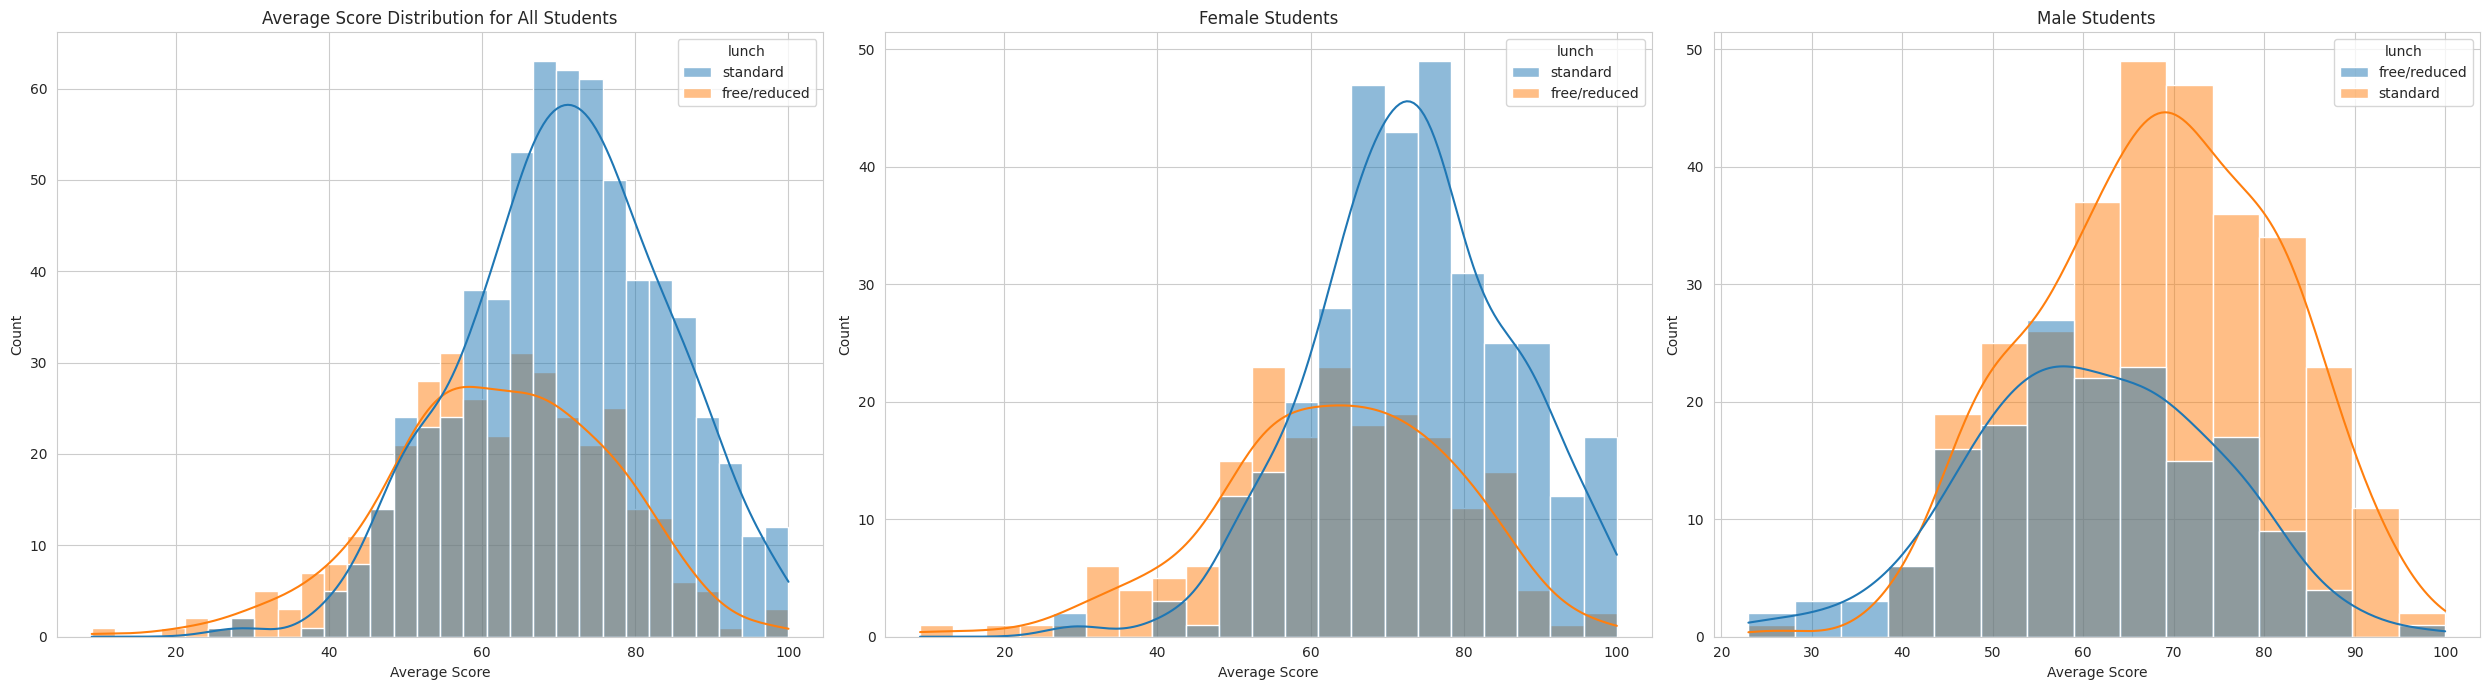

In [25]:
## Score distribution for students with different lunch types
fig, axs = plt.subplots(1, 3, figsize=(25, 7))

#plot 1: all students
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', hue='lunch' , ax=axs[0])
axs[0].set_title('Average Score Distribution for All Students')
axs[0].set_xlabel('Average Score')


#plot 2: Female students
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch', ax=axs[1])
axs[1].set_title('Female Students')
axs[1].set_xlabel('Average Score')

# Plot 3: male students
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch', ax=axs[2])
axs[2].set_title('Male Students')
axs[2].set_xlabel('Average Score')

plt.tight_layout()
plt.show()


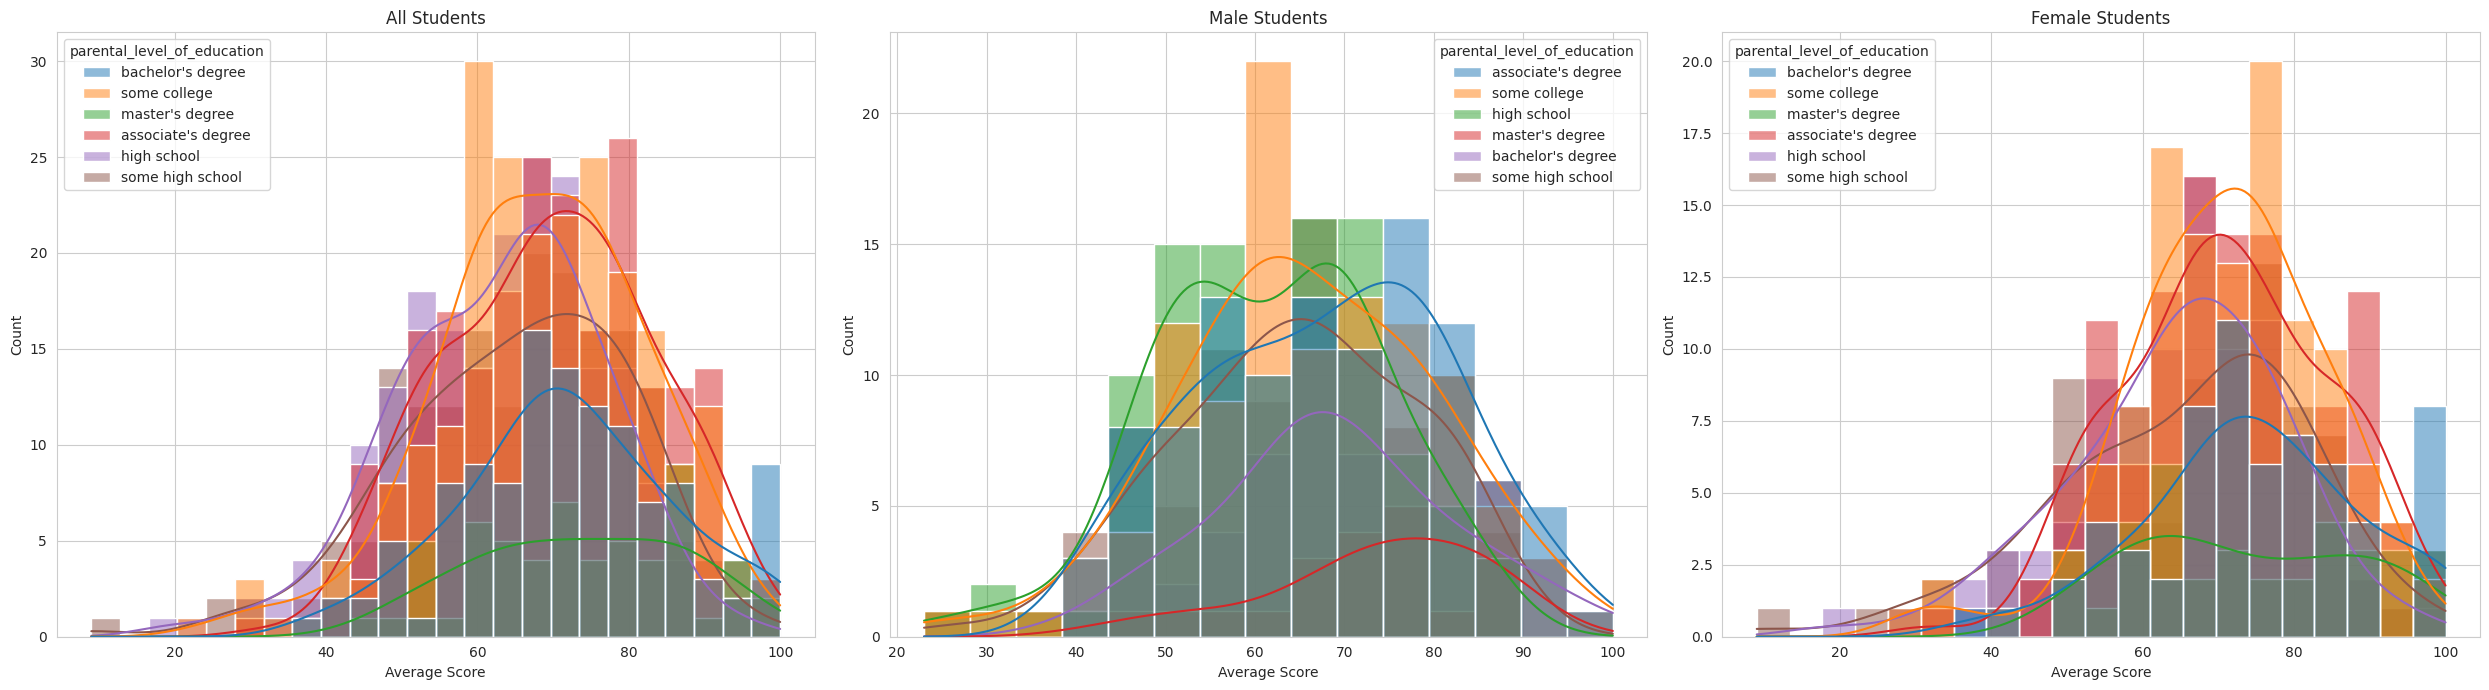

In [29]:
##Shows average score distribution by parents' education level
fig, axs = plt.subplots(1, 3, figsize=(25, 7))

# All students
sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education', ax=axs[0])
axs[0].set_title('All Students')
axs[0].set_xlabel('Average Score')

# Male students
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education', ax=axs[1])
axs[1].set_title('Male Students')
axs[1].set_xlabel('Average Score')

# Female students
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education', ax=axs[2])
axs[2].set_title('Female Students')
axs[2].set_xlabel('Average Score')

plt.tight_layout()
plt.show()


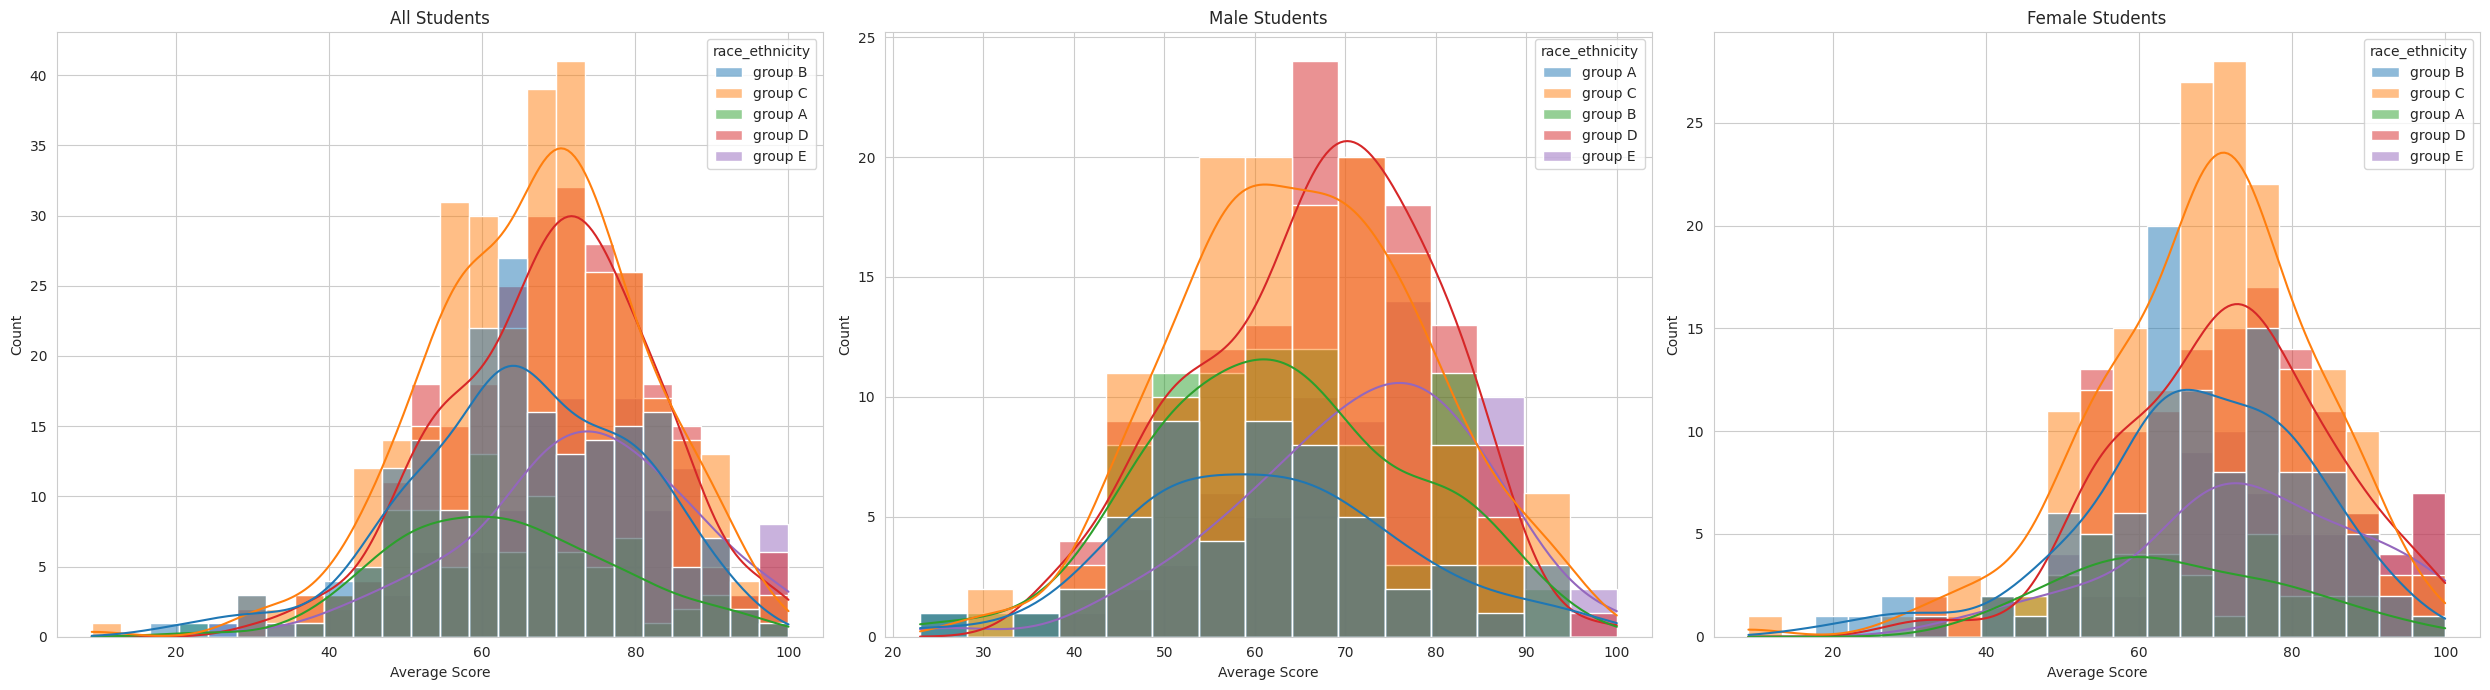

In [30]:
##Shows average score distribution by race_ethnicity

fig, axs = plt.subplots(1, 3, figsize=(25, 7))

# All students
sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity', ax=axs[0])
axs[0].set_title('All Students')
axs[0].set_xlabel('Average Score')

# Male students
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race_ethnicity', ax=axs[1])
axs[1].set_title('Male Students')
axs[1].set_xlabel('Average Score')

# Female students
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race_ethnicity', ax=axs[2])
axs[2].set_title('Female Students')
axs[2].set_xlabel('Average Score')

plt.tight_layout()
plt.show()

math_score	reading_score	writing_score

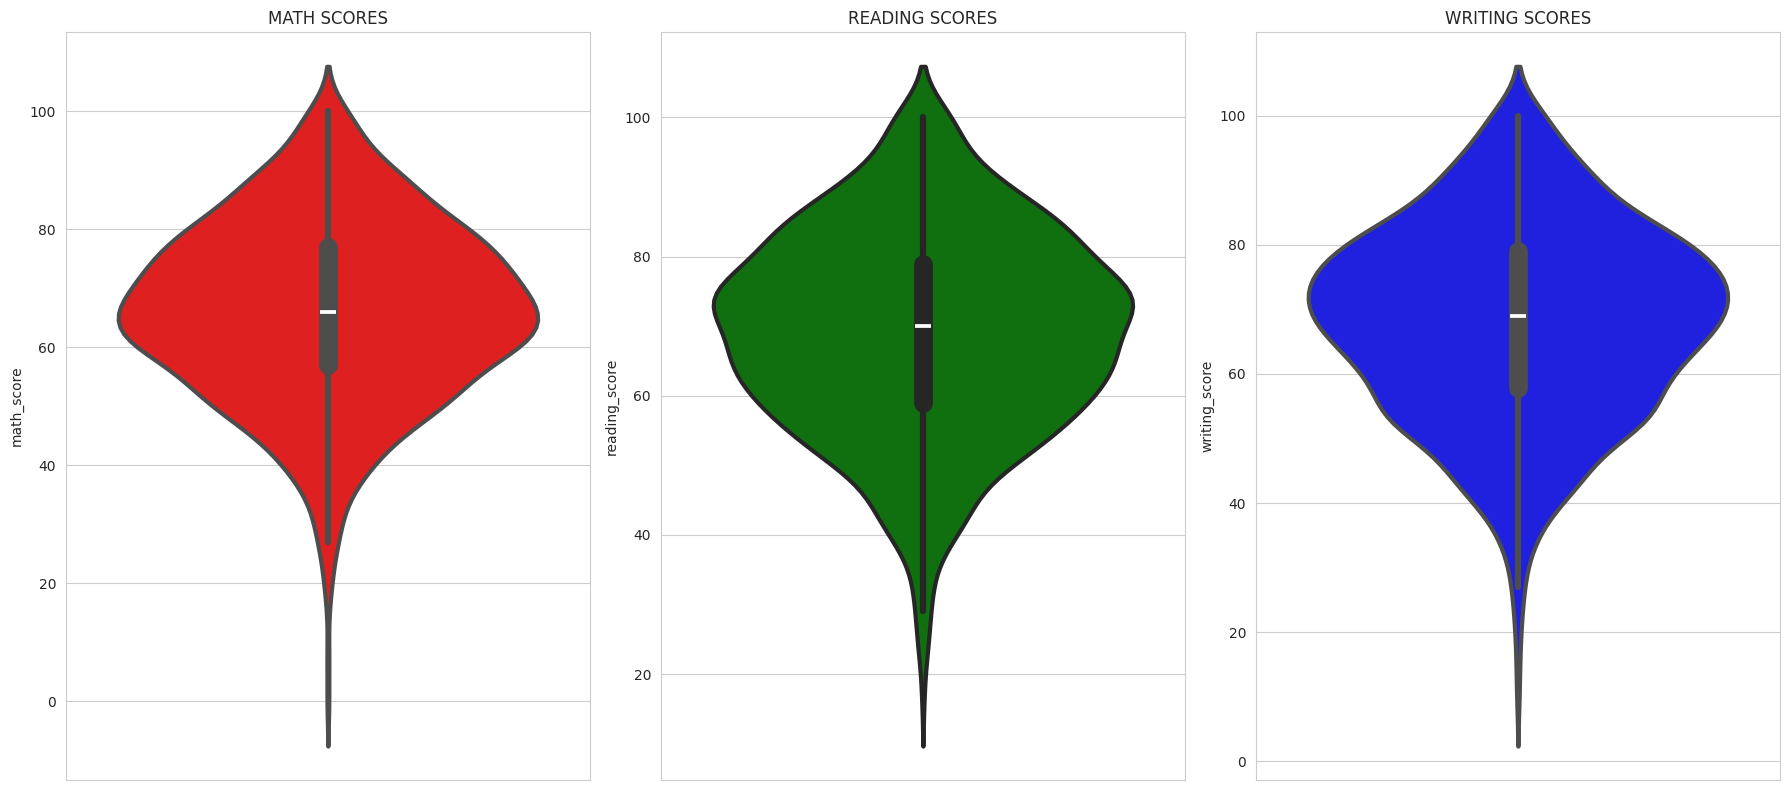

In [31]:
### plot to Shows both distribution shape and central tendency 
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

# Math scores
axs[0].set_title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3, ax=axs[0])

# Reading scores
axs[1].set_title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3, ax=axs[1])

# Writing scores
axs[2].set_title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3, ax=axs[2])

plt.tight_layout()
plt.show()


In [32]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


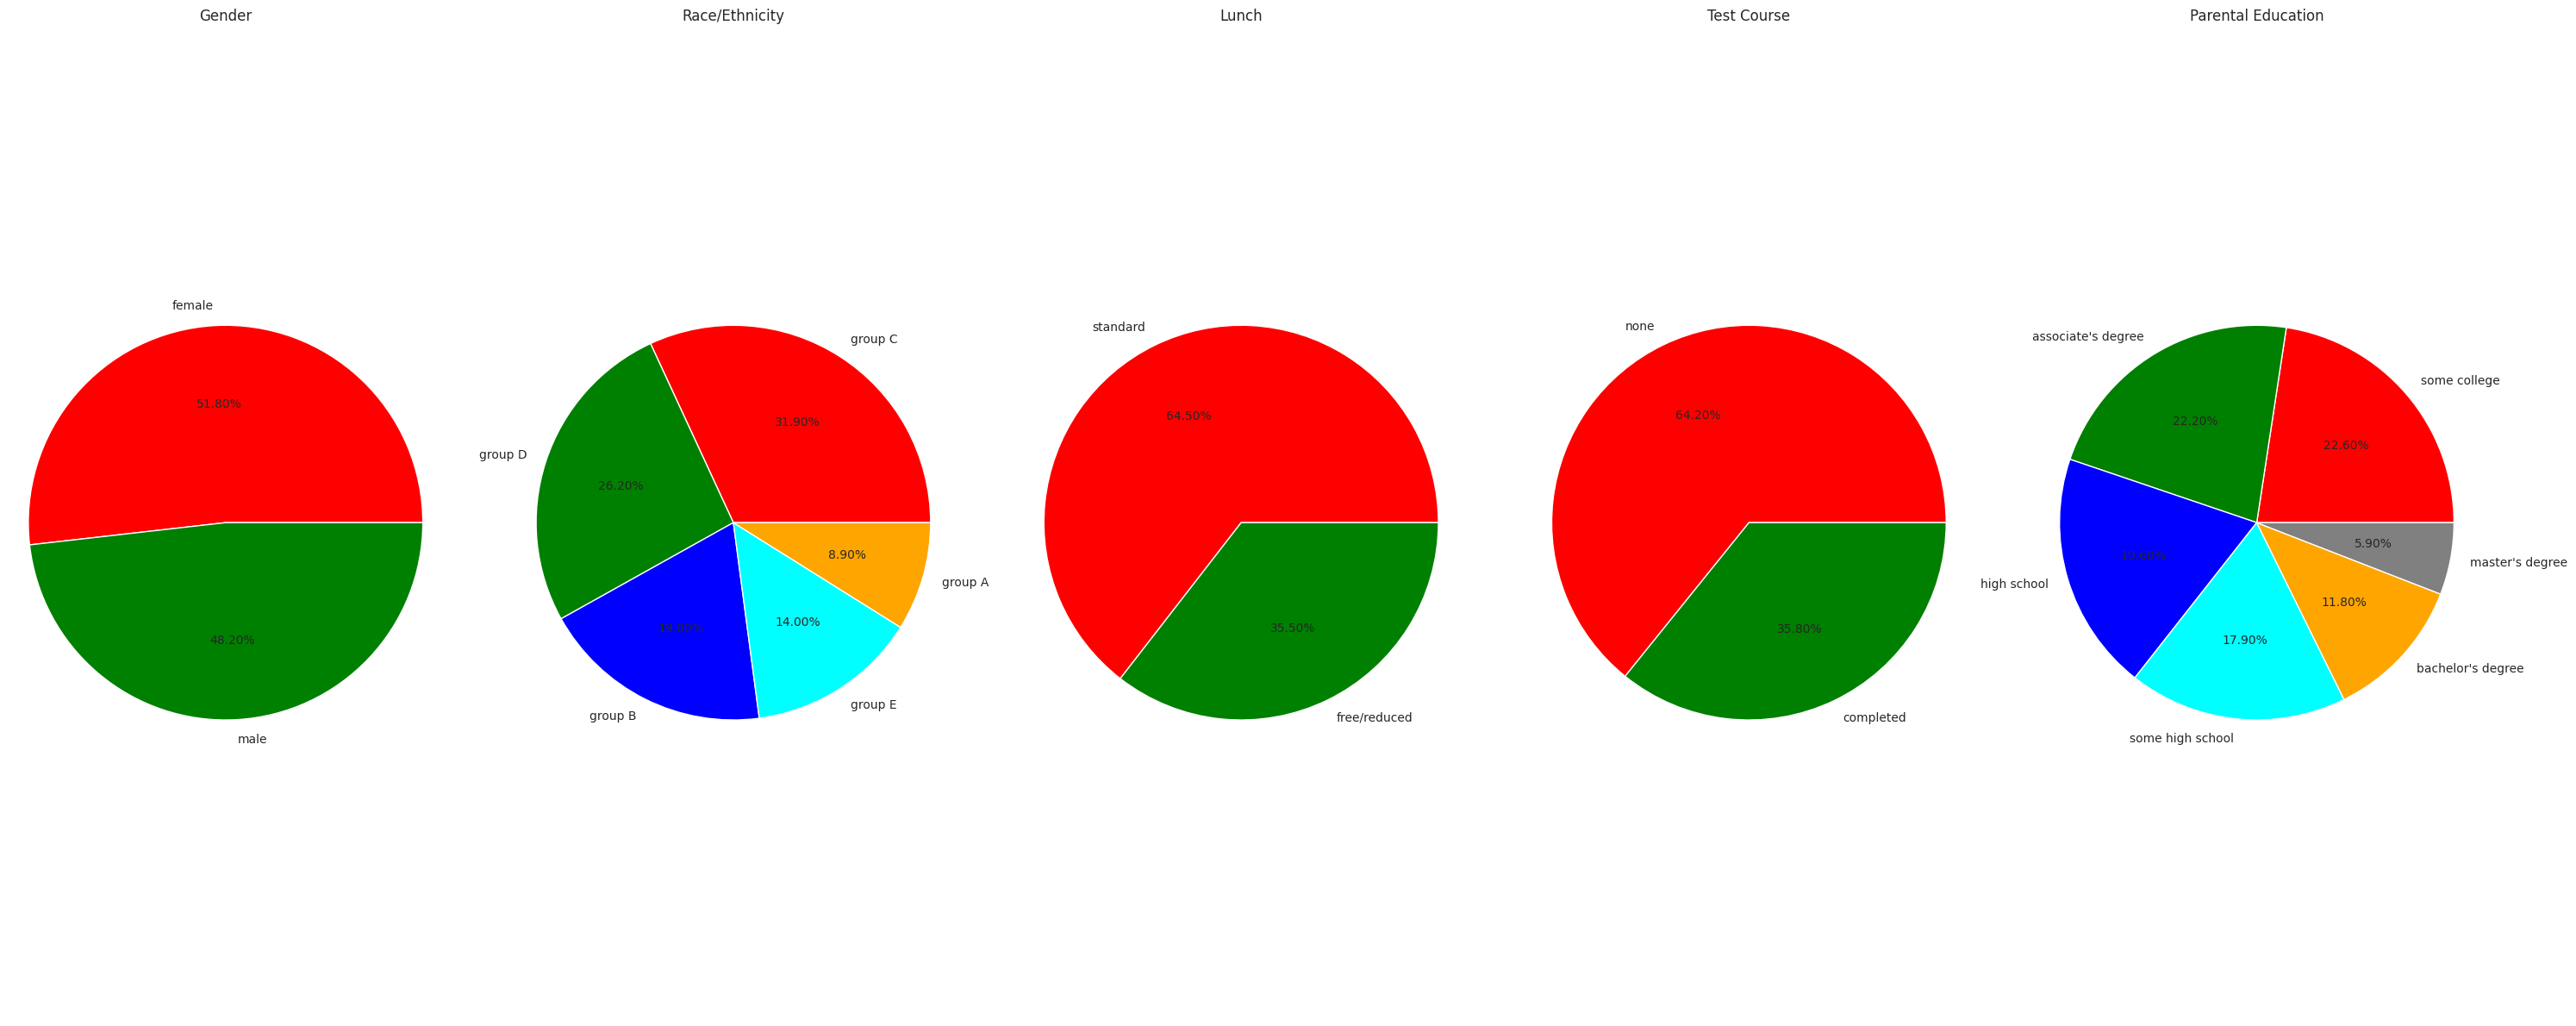

In [33]:
## creates five pie charts to show the distribution of different categorical columns
fig, axs = plt.subplots(1, 5, figsize=(30, 12))

# Gender
axs[0].pie(df['gender'].value_counts(), 
           labels=df['gender'].value_counts().index, 
           colors=['red', 'green'], 
           autopct='%.2f%%')
axs[0].set_title('Gender')
axs[0].axis('equal')

# Race/Ethnicity
axs[1].pie(df['race_ethnicity'].value_counts(), 
           labels=df['race_ethnicity'].value_counts().index, 
           colors=['red', 'green', 'blue', 'cyan', 'orange'], 
           autopct='%.2f%%')
axs[1].set_title('Race/Ethnicity')
axs[1].axis('equal')

# Lunch
axs[2].pie(df['lunch'].value_counts(), 
           labels=df['lunch'].value_counts().index, 
           colors=['red', 'green'], 
           autopct='%.2f%%')
axs[2].set_title('Lunch')
axs[2].axis('equal')

# Test Preparation
axs[3].pie(df['test_preparation_course'].value_counts(), 
           labels=df['test_preparation_course'].value_counts().index, 
           colors=['red', 'green'], 
           autopct='%.2f%%')
axs[3].set_title('Test Course')
axs[3].axis('equal')

# Parental Education
axs[4].pie(df['parental_level_of_education'].value_counts(), 
           labels=df['parental_level_of_education'].value_counts().index, 
           colors=['red', 'green', 'blue', 'cyan', 'orange', 'grey'], 
           autopct='%.2f%%')
axs[4].set_title('Parental Education')
axs[4].axis('equal')

plt.tight_layout()
plt.show()


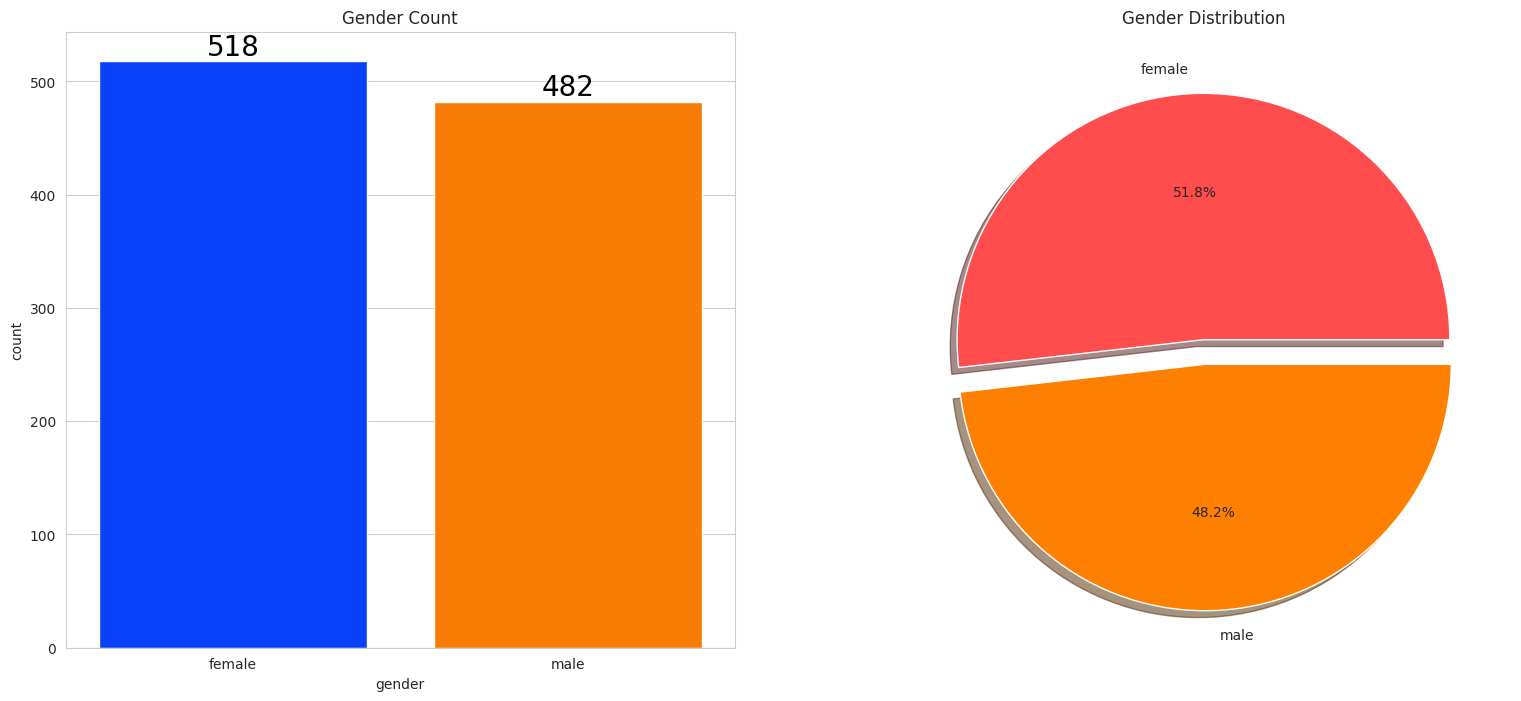

In [35]:
## Bar and pi plot of gender count 
fig, ax = plt.subplots(1, 2, figsize=(19, 8))

# Bar plot of gender counts with labels
sns.countplot(x='gender', data=df, palette='bright', saturation=0.95, ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
ax[0].set_title('Gender Count')

# Pie chart of gender distribution
gender_counts = df['gender'].value_counts()
ax[1].pie(gender_counts, labels=gender_counts.index, explode=[0, 0.1], 
          autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
ax[1].set_title('Gender Distribution')

plt.show()


In [37]:
## groups your DataFrame df by the gender column, then calculates the mean for each numerical column within each gender group.
gender_group = df.select_dtypes(include='number').groupby(df['gender']).mean()

gender_group


,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


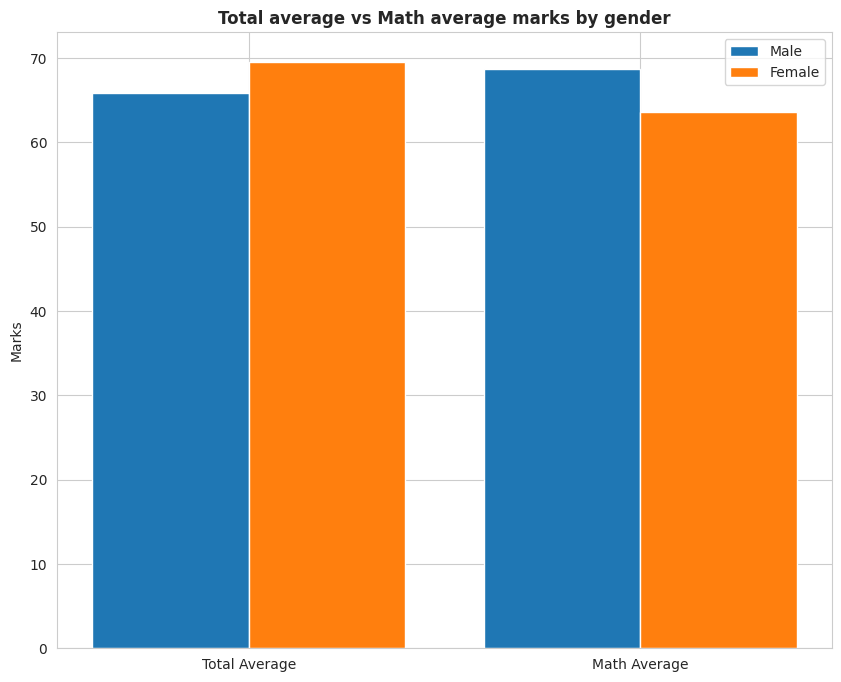

In [39]:
## Total Average vs Math Average Marks by Gender

plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

# Use .loc for clarity and avoid order assumptions
female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math_score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math_score']]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs Math average marks by gender", fontweight='bold')
plt.legend()
plt.show()


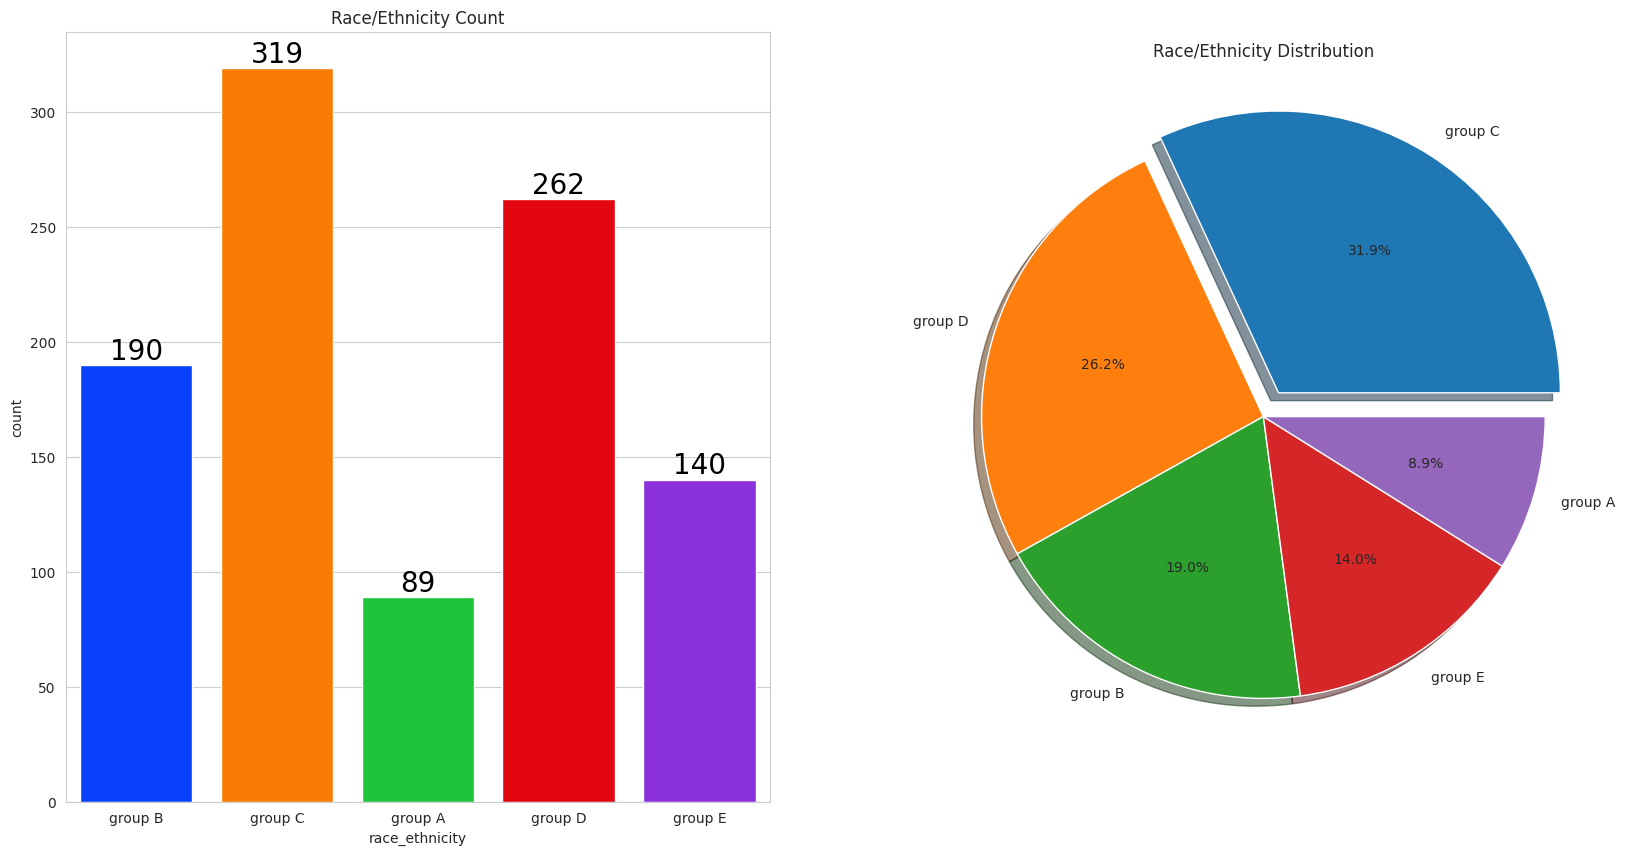

In [40]:
## plot Race/Ethnicity Count and distribution
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Bar plot
sns.countplot(x='race_ethnicity', data=df, palette='bright', saturation=0.95, ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
ax[0].set_title('Race/Ethnicity Count')

# Pie chart
counts = df['race_ethnicity'].value_counts()
ax[1].pie(counts, labels=counts.index, explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True)
ax[1].set_title('Race/Ethnicity Distribution')

plt.show()


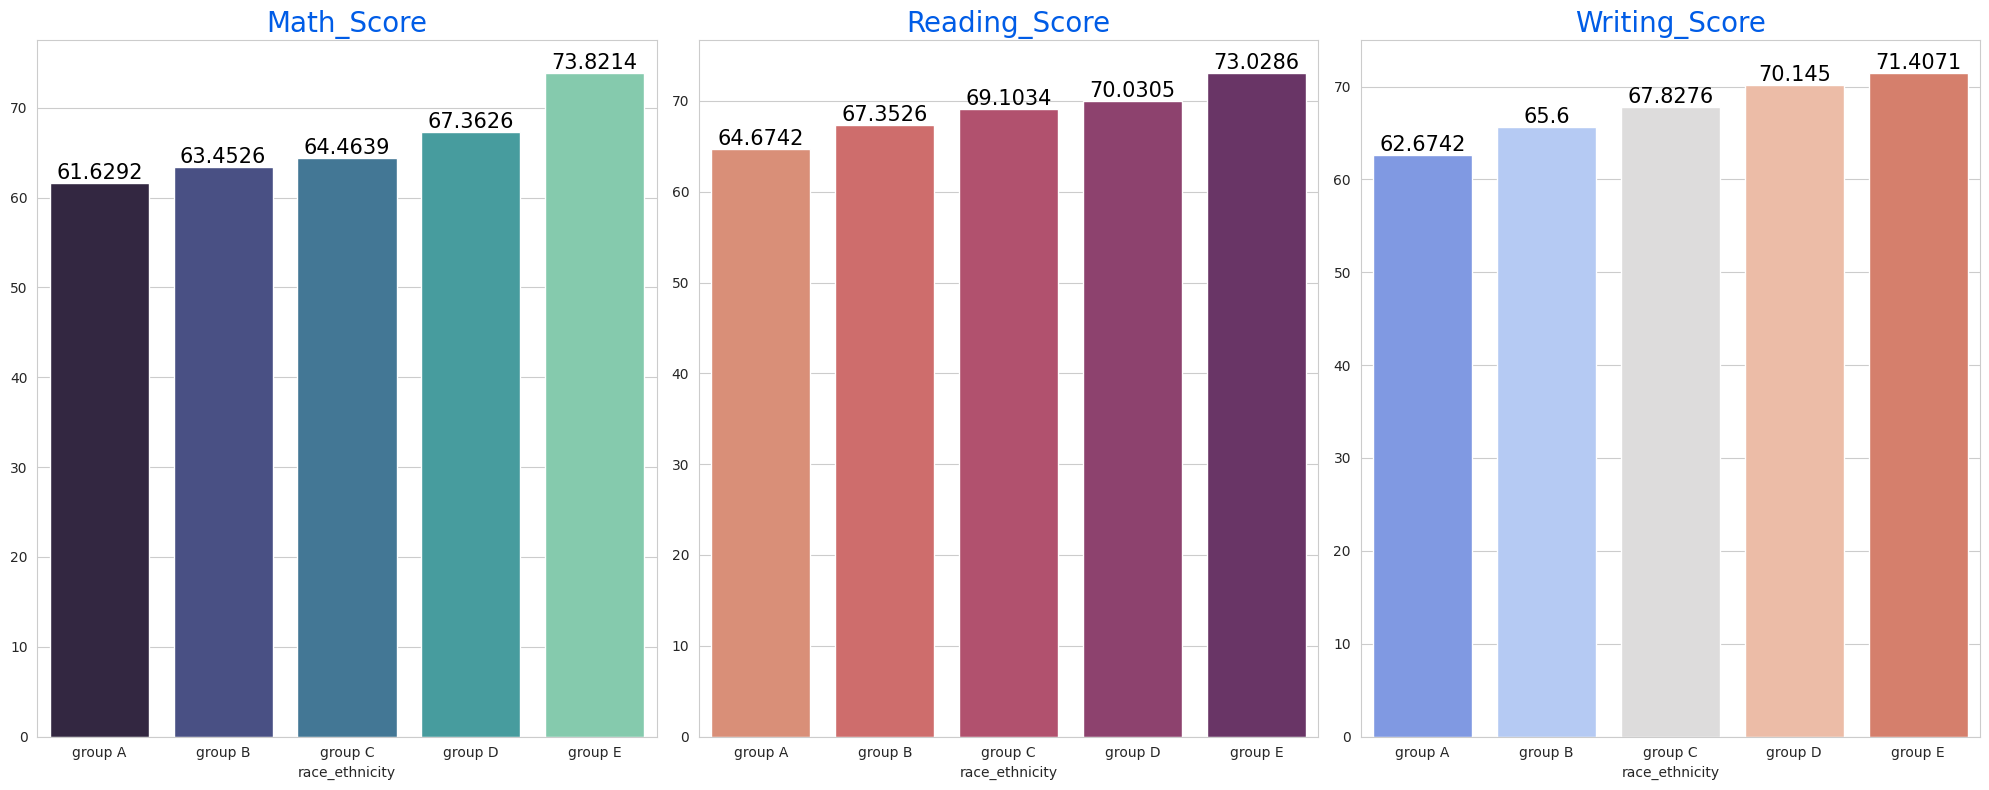

In [41]:
## plot the average score by race/ethnicity group for math, reading, and writing.
Group_data2 = df.groupby('race_ethnicity')

fig, ax = plt.subplots(1, 3, figsize=(20, 8))

scores = ['math_score', 'reading_score', 'writing_score']
palettes = ['mako', 'flare', 'coolwarm']
titles = ['Math_Score', 'Reading_Score', 'Writing_Score']

for i in range(3):
    means = Group_data2[scores[i]].mean()
    sns.barplot(x=means.index, y=means.values, palette=palettes[i], ax=ax[i])
    ax[i].set_title(titles[i], color='#005ce6', size=20)
    for container in ax[i].containers:
        ax[i].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()


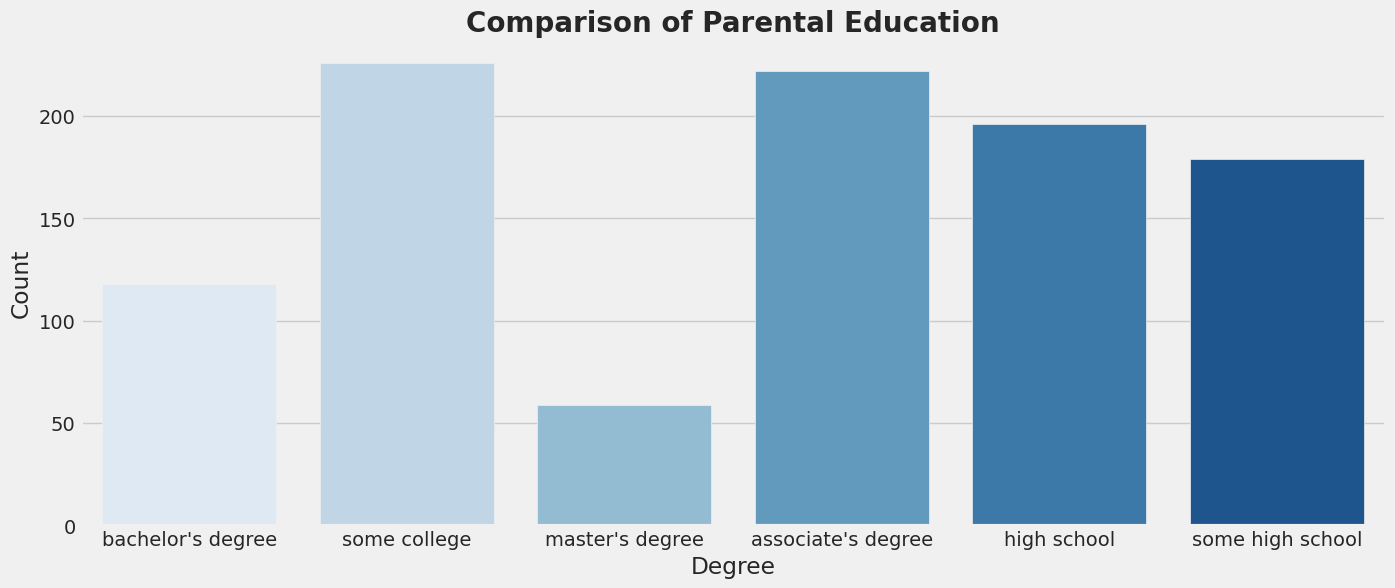

In [43]:
## creates a count plot showing the distribution of parental education levels.
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('fivethirtyeight')

sns.countplot(x='parental_level_of_education', data=df, palette='Blues')
plt.title('Comparison of Parental Education', fontsize=20, fontweight='bold')
plt.xlabel('Degree')
plt.ylabel('Count')

plt.show()


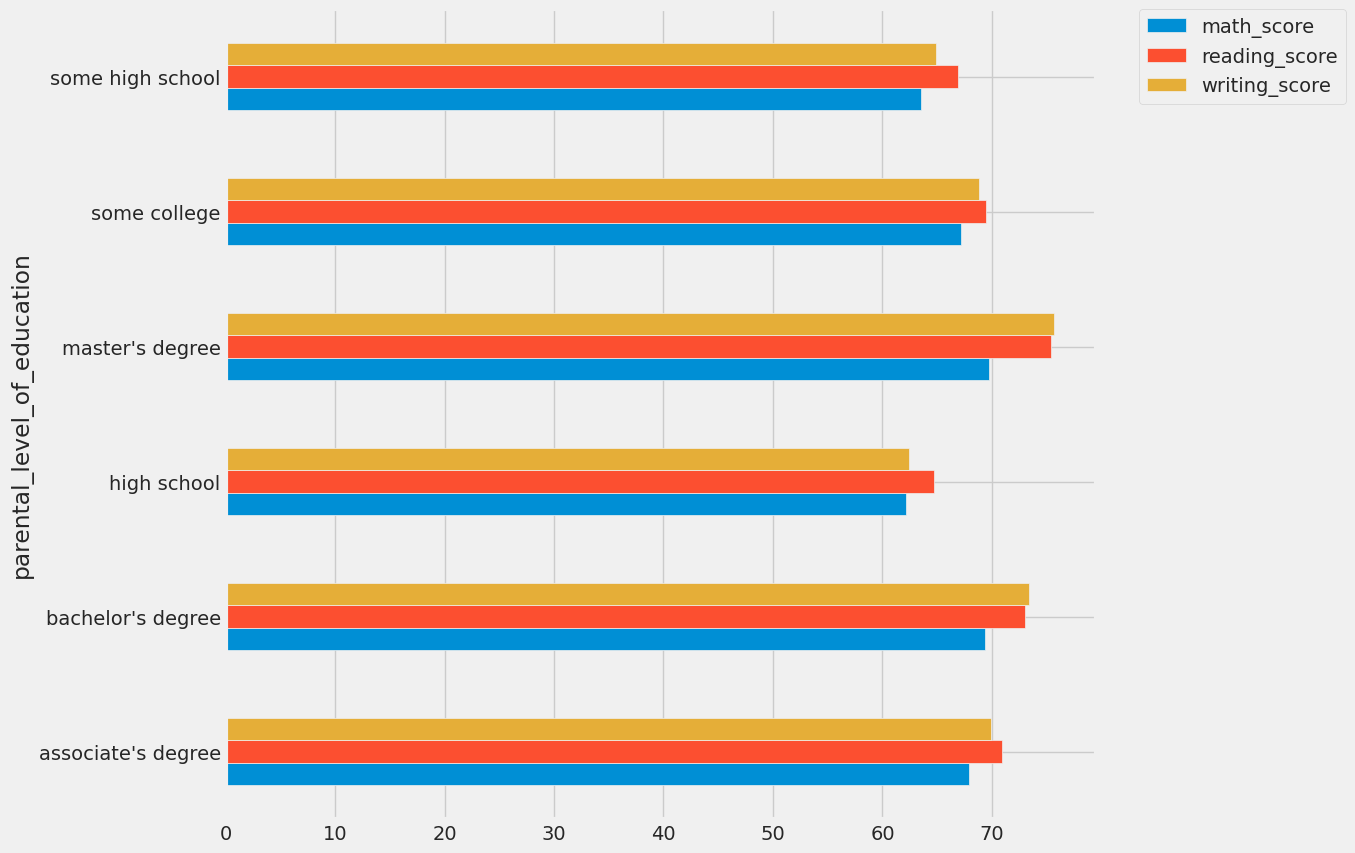

In [44]:
## groups data by parental education, calculates the mean of all numeric columns for each group,
# and plots a horizontal bar chart.

df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean() \
  .plot(kind='barh', figsize=(10, 10))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



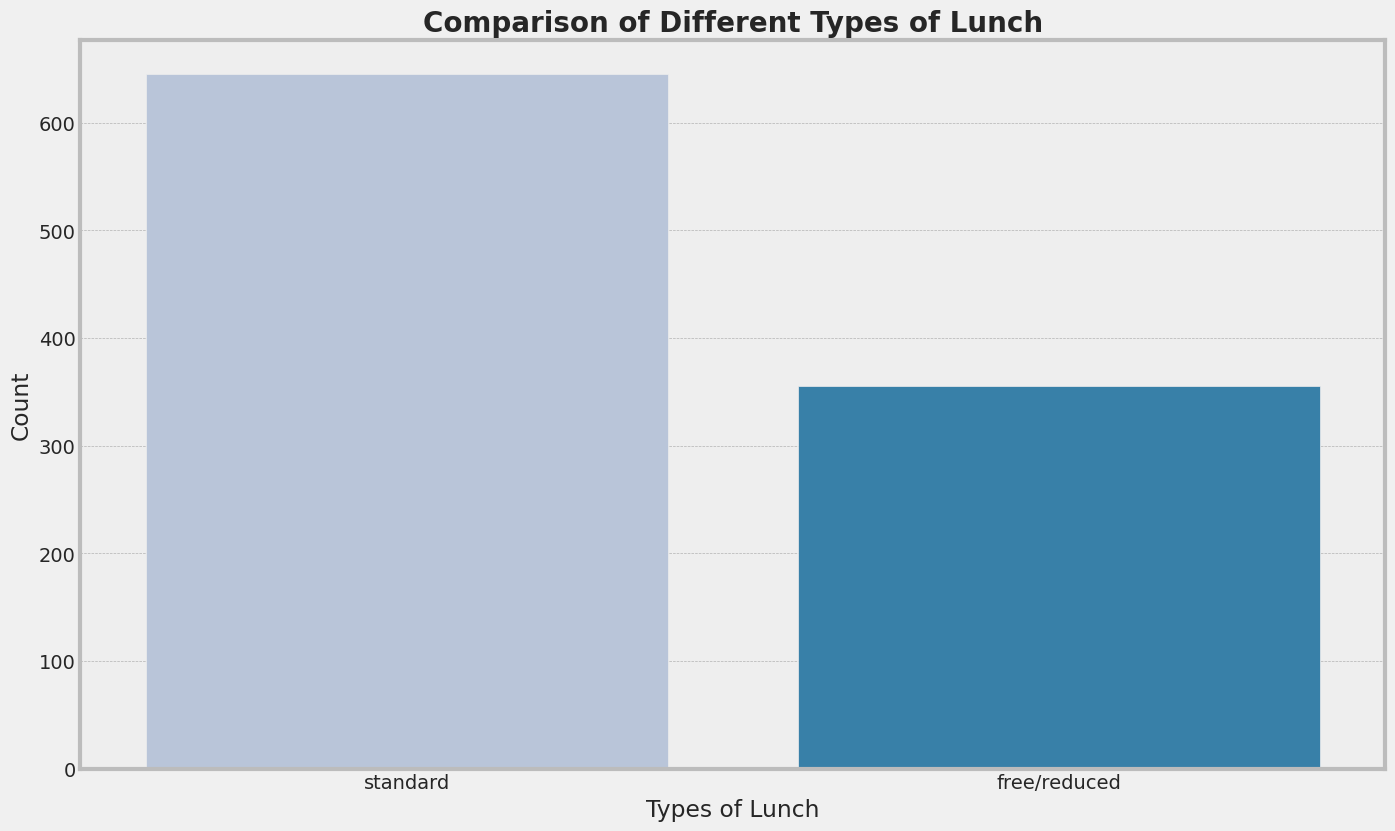

In [48]:
##  creates a count plot for the 'lunch' column
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('bmh')

sns.countplot(x='lunch', data=df, palette='PuBu')
plt.title('Comparison of Different Types of Lunch', fontsize=20, fontweight='bold')
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

plt.show()


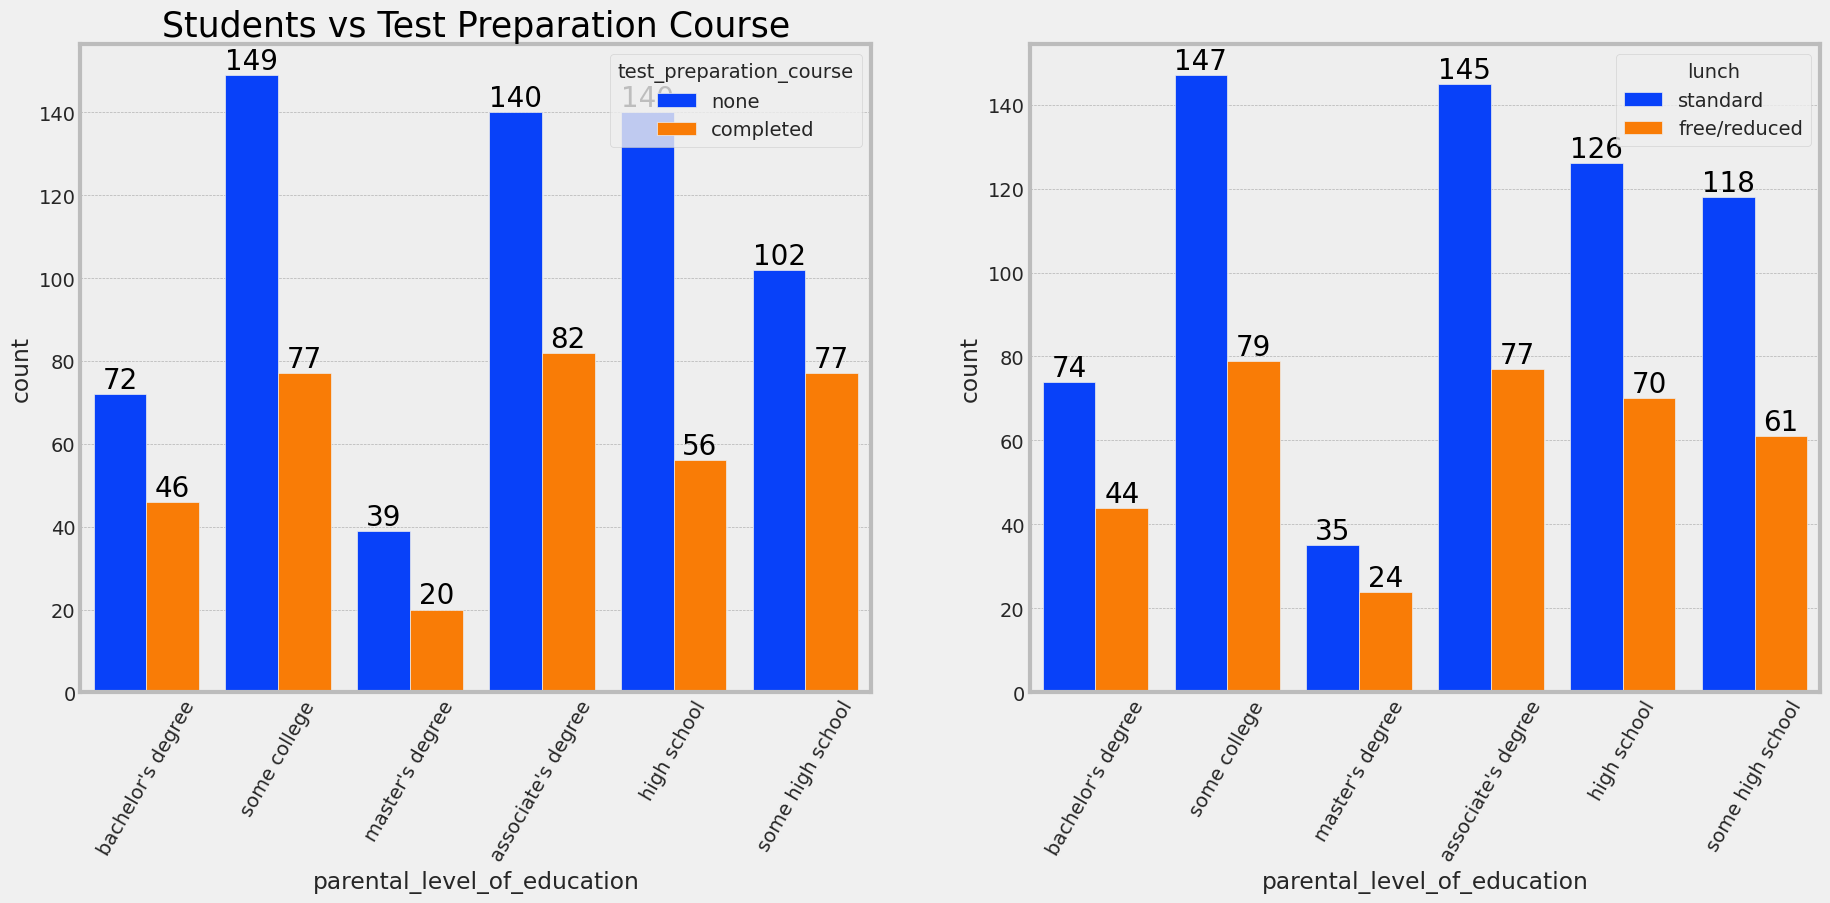

In [54]:
## plot the Students vs Test Preparation Course
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(
    x='parental_level_of_education',
    data=df,
    palette='bright',
    hue='test_preparation_course',
    saturation=0.95,
    ax=ax[0]
)
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=60)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

sns.countplot(
    x='parental_level_of_education',
    data=df,
    palette='bright',
    hue='lunch',
    saturation=0.95,
    ax=ax[1]
)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=60)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.show()



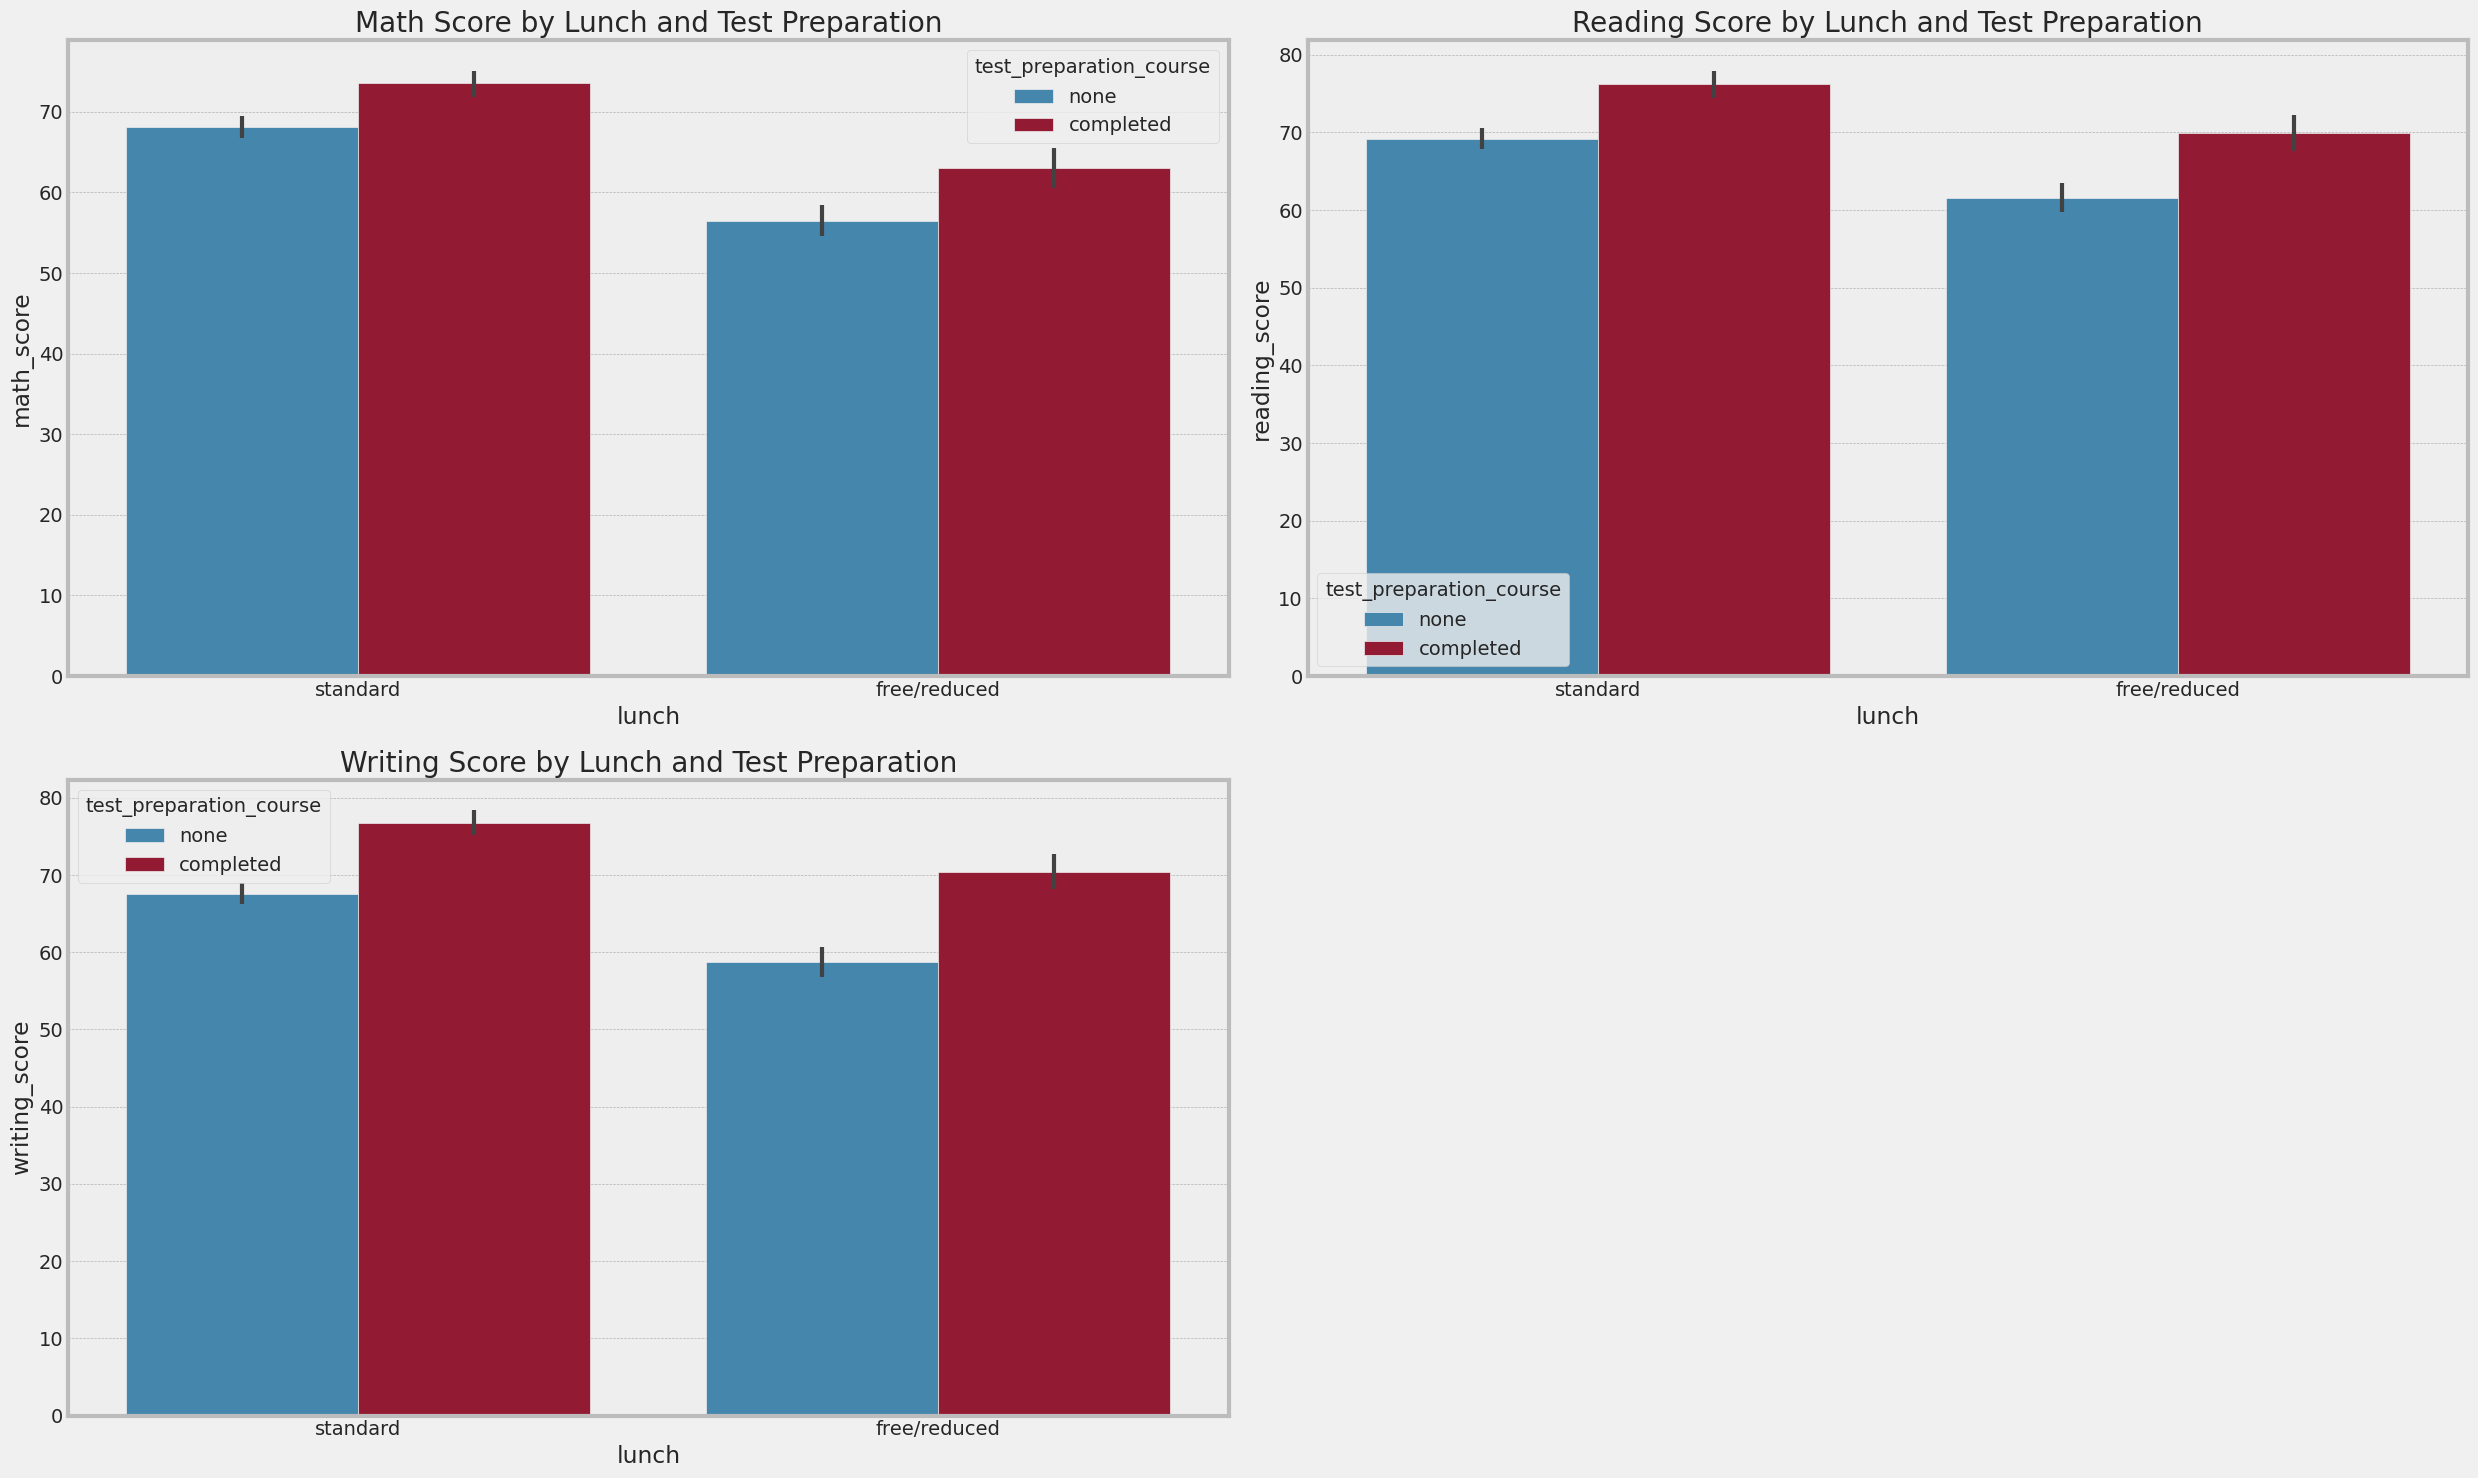

In [58]:
## plot the Math Score by Lunch and Test Preparation
plt.figure(figsize=(25, 15))

plt.subplot(2, 2, 1)
sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df)
plt.title('Math Score by Lunch and Test Preparation')

plt.subplot(2, 2, 2)
sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df)
plt.title('Reading Score by Lunch and Test Preparation')

plt.subplot(2, 2, 3)
sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df)
plt.title('Writing Score by Lunch and Test Preparation')

plt.tight_layout()
plt.show()


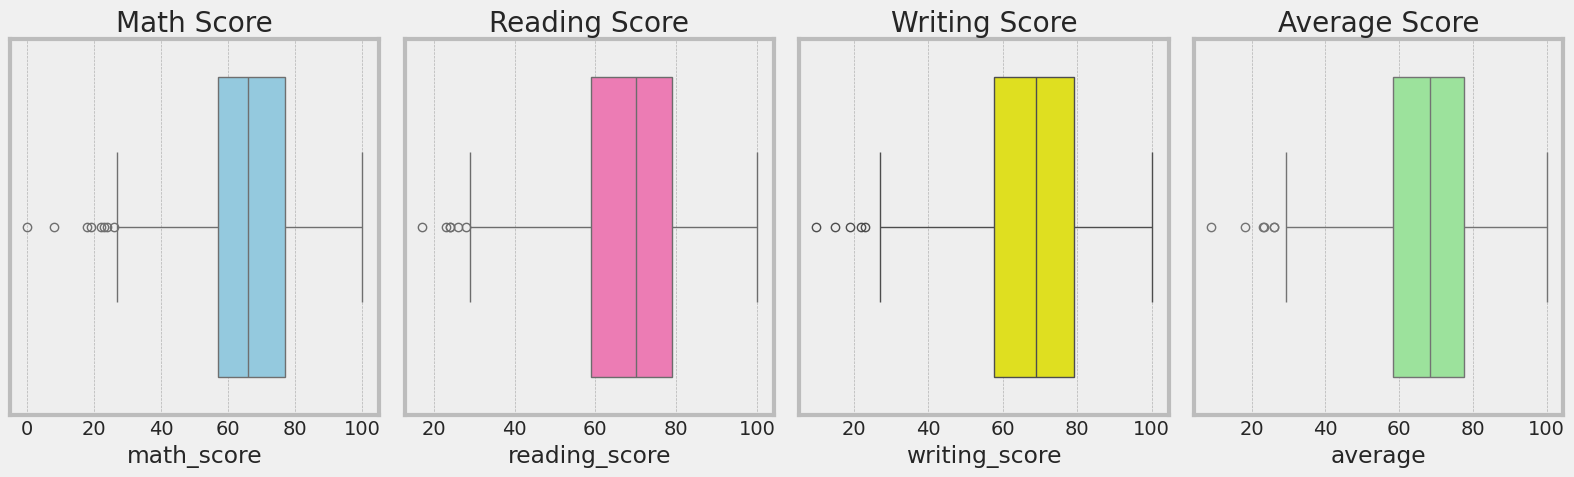

In [ ]:
## box plot for the math, reading, writing scores and average score
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

sns.boxplot(x=df['math_score'], color='skyblue', ax=axes[0])
axes[0].set_title('Math Score')

sns.boxplot(x=df['reading_score'], color='hotpink', ax=axes[1])
axes[1].set_title('Reading Score')

sns.boxplot(x=df['writing_score'], color='yellow', ax=axes[2])
axes[2].set_title('Writing Score')

sns.boxplot(x=df['average'], color='lightgreen', ax=axes[3])
axes[3].set_title('Average Score')

plt.tight_layout()
plt.show()


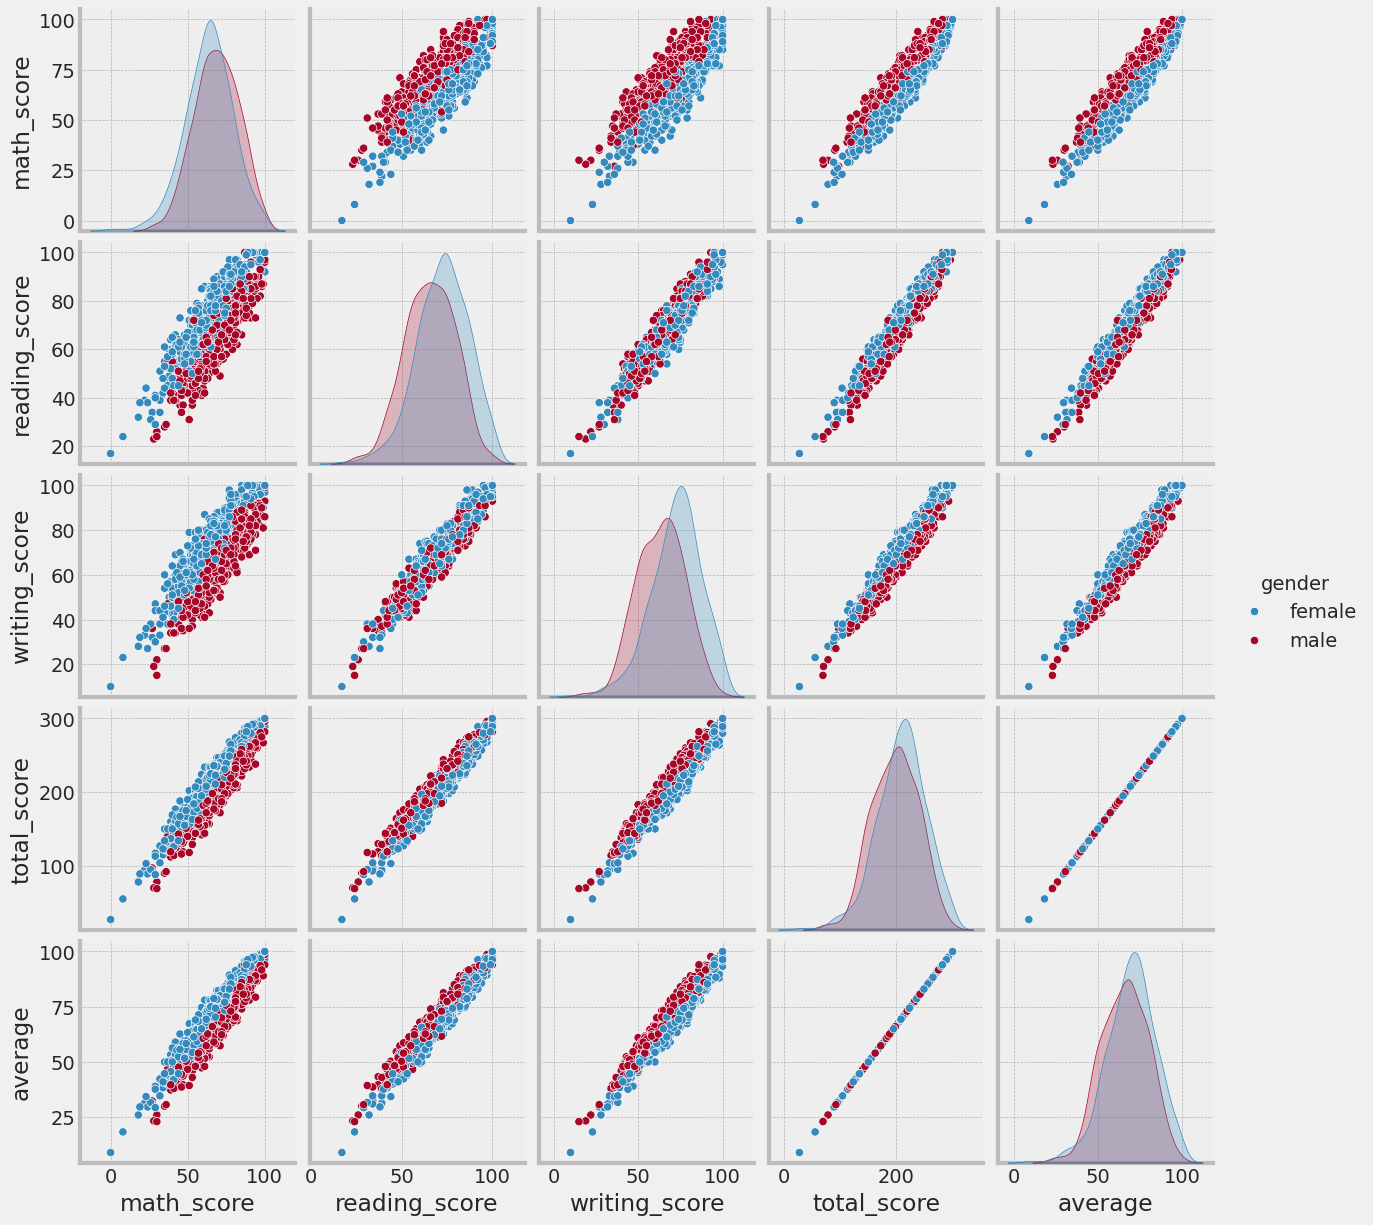

In [60]:
##  plots a pairplot of the df, colored by the gender column
sns.pairplot(df,hue = 'gender')
plt.show()